In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'modeling_df.csv')

In [3]:
df =df.reset_index(drop=True)
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0','index'] ,axis=1 )
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]


In [7]:
pos_df = df.groupby(['team','wins','position','year']).sum().reset_index()
pos_df

,team,wins,position,year,totalCash
0,ARI,3,DB,2018,11906000
1,ARI,3,K,2018,3000000
2,ARI,3,S,2018,3750000
3,ARI,3,WR,2018,555000
4,ARI,4,WR,2010,6150000
...,...,...,...,...,...
1731,WAS,9,QB,2016,3000000
1732,WAS,9,TE,2016,35000
1733,WAS,9,WR,2016,5847119
1734,WAS,10,DE,2012,465000


In [8]:
offensive_df = pos_df[pos_df['position'].isin(["WR", "OT", "OG", "C", "TE", "QB", "FB", "RB", "OL"])]

In [9]:
#Cap spending less than 10 million is not logical and indicates missing data for that entry
offensive_df = offensive_df[offensive_df['totalCash'] > 10000000]

,team,wins,position,year,totalCash
14,ARI,6,WR,2012,26250000
15,ARI,6,WR,2016,11000000
17,ARI,7,WR,2011,20000000
25,ARI,9,WR,2017,11605181
35,ARI,11,WR,2014,13000000
...,...,...,...,...,...
1500,SEA,10,WR,2017,16312659
1554,SF,6,WR,2010,12795000
1644,TEN,3,QB,2015,16330324
1688,TEN,10,OG,2017,17648878


In [10]:
#We limit the dataframes to only the offensive positions
pos_df_2016 = df_2016.groupby(['team','wins','position']).sum().reset_index()
offensive_2016 = pos_df_2016[pos_df_2016['position'].isin(["WR", "OT", "OG", "C", "TE", "QB", "FB", "RB", "OL"])]
offensive_2016 = offensive_2016.groupby(['team','wins']).sum().reset_index()

In [11]:
linear_df = offensive_df

Coefficients: 
 [[-1.32812673e-07]]
Mean squared error: 11.22
Coefficient of determination: -0.07


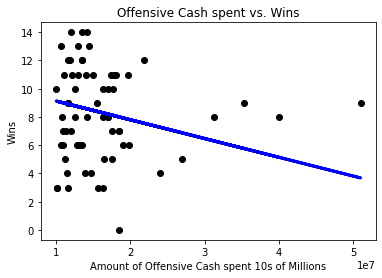

In [12]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
X = np.array(linear_df['totalCash']).reshape(-1, 1)
y = np.array(linear_df['wins']).reshape(-1,1)

# Split the totalCash spent into training and test set
X_train = X[:20]
X_test = X[20:]

# Split the predicted wins into training and test set
y_train = y[:20]
y_test = y[20:]


reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
y_pred = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel('Amount of Offensive Cash spent 10s of Millions')
plt.ylabel('Wins')
plt.title('Offensive Cash spent vs. Wins')
plt.show()

Coefficients: 
 [[7.84677086e-08]]
Mean squared error: 6.28
Coefficient of determination: 0.21


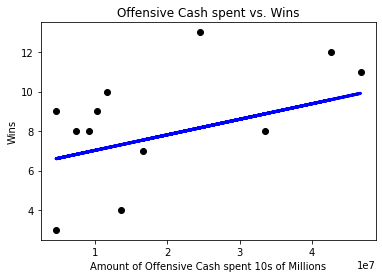

In [13]:
linear_df = offensive_2016
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
X = np.array(linear_df['totalCash']).reshape(-1, 1)
y = np.array(linear_df['wins']).reshape(-1,1)

# Split the totalCash spent into training and test set
X_train = X[:20]
X_test = X[20:]

# Split the predicted wins into training and test set
y_train = y[:20]
y_test = y[20:]


reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
y_pred = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel('Amount of Offensive Cash spent 10s of Millions')
plt.ylabel('Wins')
plt.title('Offensive Cash spent vs. Wins')
plt.show()

In [14]:
pos_df_year = pos_df
pos_df_year = pos_df_year[pos_df['totalCash']> 5000000]
QB_df = pos_df_year[pos_df_year['position'] == 'QB'].reset_index().drop(['position'], axis = 1)
RB_df = pos_df_year[pos_df_year['position'] == 'RB'].reset_index().drop(['position'], axis =1)
pos_df_year

,team,wins,position,year,totalCash
0,ARI,3,DB,2018,11906000
4,ARI,4,WR,2010,6150000
7,ARI,6,DB,2016,13636495
14,ARI,6,WR,2012,26250000
15,ARI,6,WR,2016,11000000
...,...,...,...,...,...
1692,TEN,10,S,2017,7000000
1717,WAS,8,DB,2015,7833948
1719,WAS,8,DT,2015,8007249
1721,WAS,8,OL,2015,14161626


In [15]:
QB_df['QB_spend'] = QB_df['totalCash']
QB_df['RB_spend'] = RB_df['totalCash']
spend_df = QB_df
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
#Create an extra colum to check if a teamhas more than 8 wins. I use red and blue to indicate true and false 
spend_df['ten_or_more_wins'] = np.where(spend_df['wins'] > 8 , "red", "blue")
spend_df = spend_df.dropna()

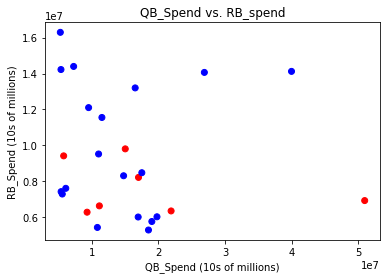

In [16]:
plt.scatter(spend_df['QB_spend'], spend_df['RB_spend'], color=spend_df["ten_or_more_wins"])
plt.xlabel('QB_Spend (10s of millions)')
plt.ylabel('RB_Spend (10s of millions)')
plt.title('QB_Spend vs. RB_spend')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X = spend_df.drop(['team', 'wins', 'totalCash', 'year', 'ten_or_more_wins'] , axis =1)
y = spend_df['ten_or_more_wins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [18]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
#I picked 1 neighbor due to the lack of data available to classify
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
X_train
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.625

In [19]:
y_pred

array(['blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'],
      dtype=object)

In [20]:
y_test

8      red
19    blue
24    blue
2     blue
21    blue
6     blue
11     red
1     blue
Name: ten_or_more_wins, dtype: object